In [1]:
# Import Libraries

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# This is notebook where I try to improve my visualization knowledge. 

I search other notebooks to find visualization which inspires me.

Try to add the most usefull and aesthetic ones and add some comments to easily adaptable for future needs.

Base on Titanic database.

# OVERVIEW

1. Size/height & aspect in sns vs width and height in Plotly

2. Templates in Plotly

3. Colors 

4. Types



In [2]:
# Load data Titanic

df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 1. Size /height & aspect

Below quick search via size

To more / less know how big visualisation you need you may play
- height describe how big y will be - if you need square you don't need nothing more 
- aspect describe how big x will be - it will multiple height then if you give aspect 2 x will be 2 time bigger then y 

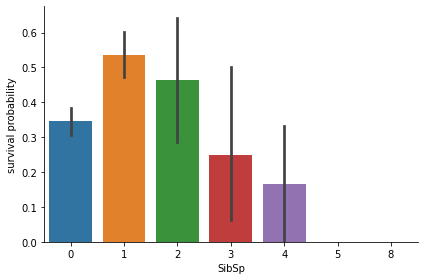

In [3]:
# Explore SibSp feature vs Survived

g = sns.catplot(x="SibSp",y="Survived",data=df_train,kind="bar", height = 4, aspect=1.5)
# g.despine(left=True)
g = g.set_ylabels("survival probability")

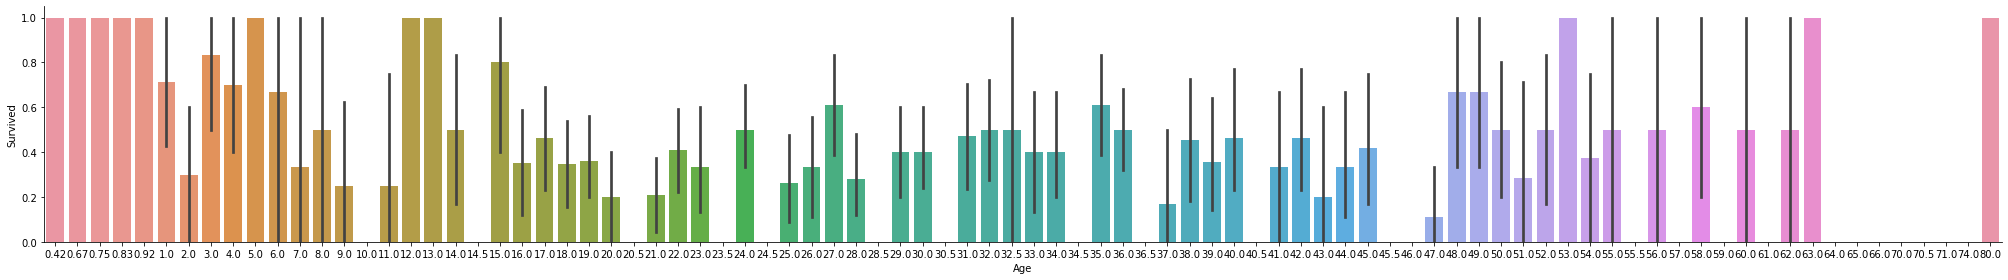

In [4]:
g = sns.catplot(x="Age",y="Survived",data=df_train,kind="bar", height = 4, aspect=7)

****Plotly ****

Play parameters: width and height to adjust size of viz.


In [5]:
fig= px.histogram(df_train, x="SibSp",y="Survived", width=600,height=300, template='simple_white')
fig.show()

# 2. Type of templates - Plotly

To see information about the available themes and the current default theme,check as below


In [6]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

If a theme is not provided to a Plotly Express function or to a graph object figure, then the default theme is used. The default theme starts out as "plotly", but it can be changed by setting the plotly.io.templates.default property to the name of a registered theme.

import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_white"

to disable 

import plotly.io as pio
pio.templates.default = "none"

In [7]:
for template in ['plotly', 'plotly_white','plotly_dark', 'ggplot2','seaborn','simple_white','presentation','xgridoff','ygridoff', 'gridon']:
  x= px.scatter(df_train,
           x= 'Age',
           y= 'Survived',
           color='Sex',
           size_max=20, 
           height= 300, 
           width = 700,
           title= f'Template {template}',
           template = template)
  x.show()

# 3. Colors 

More about colore seaborn : https://seaborn.pydata.org/tutorial/color_palettes.html

**Types of color palette**
Three major types of color palette exist for data visualization:

**Diverging palettes** - If our numeric variable **has a meaningful central value**, like zero, then we can apply a diverging palette. A diverging palette is essentially a combination of two sequential palettes with a shared endpoint sitting at the central value. Values larger than the center are assigned to colors on one side of the center, while smaller values get assigned to colors on the opposing side.

**Qualitative palettes **- A qualitative palette is used when the variable **is categorical in nature**. Categorical variables are those that take on distinct labels without inherent ordering. Examples include country or state, race, and gender. Each possible value of the variable is assigned one color from a qualitative palette.

**Sequential palettes** - When the variable assigned to be colored **is numeric or has inherently ordered values**, then it can be depicted with a sequential palette. Colors are assigned to data values in a continuum, usually based on hue, lightness, or both.





**TIPs  **

**AVOID UNNECESSERY USAGE OF COLORS ** - a lot of tips not only about colors https://www.storytellingwithdata.com/

use the same or similar palet across visualisation 

Need more choices use palette generator  https://www.learnui.design/tools/data-color-picker.html



In [8]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad
    
    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

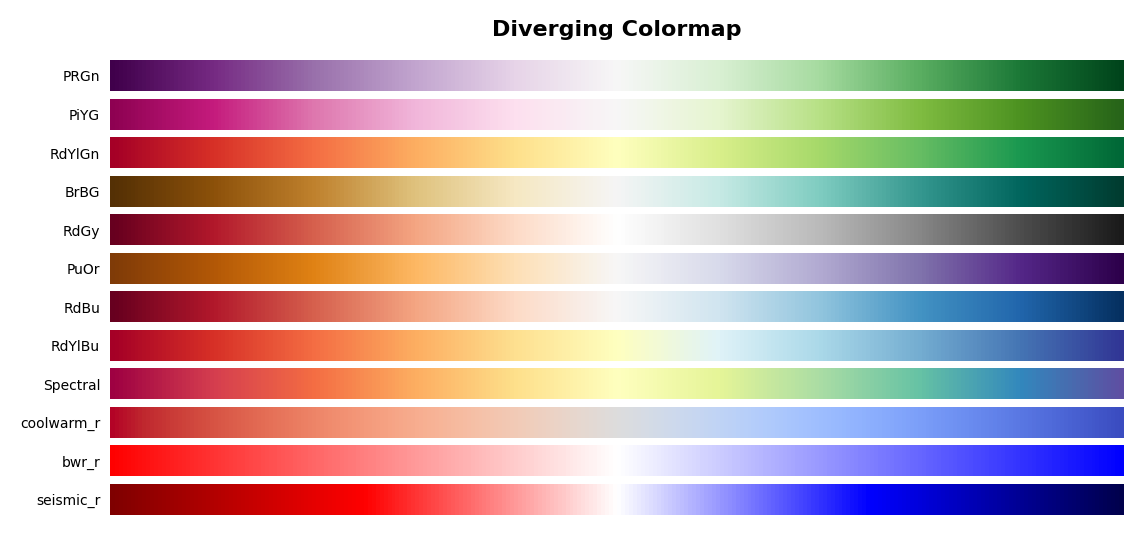

In [9]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

In [10]:
sns.color_palette("seismic_r")

[(0.7823529411764706, 0.0, 0.0),
 (1.0, 0.1450980392156863, 0.1450980392156863),
 (1.0, 0.7098039215686275, 0.7098039215686275),
 (0.7098039215686274, 0.7098039215686274, 1.0),
 (0.14509803921568631, 0.14509803921568631, 1.0),
 (0.0, 0.0, 0.6952941176470588)]

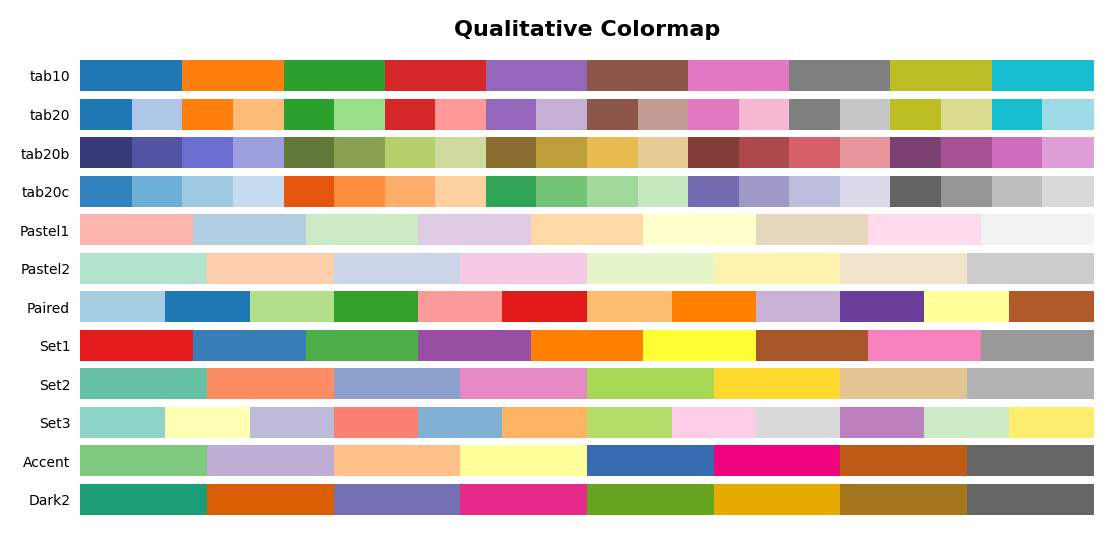

In [11]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

In [12]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

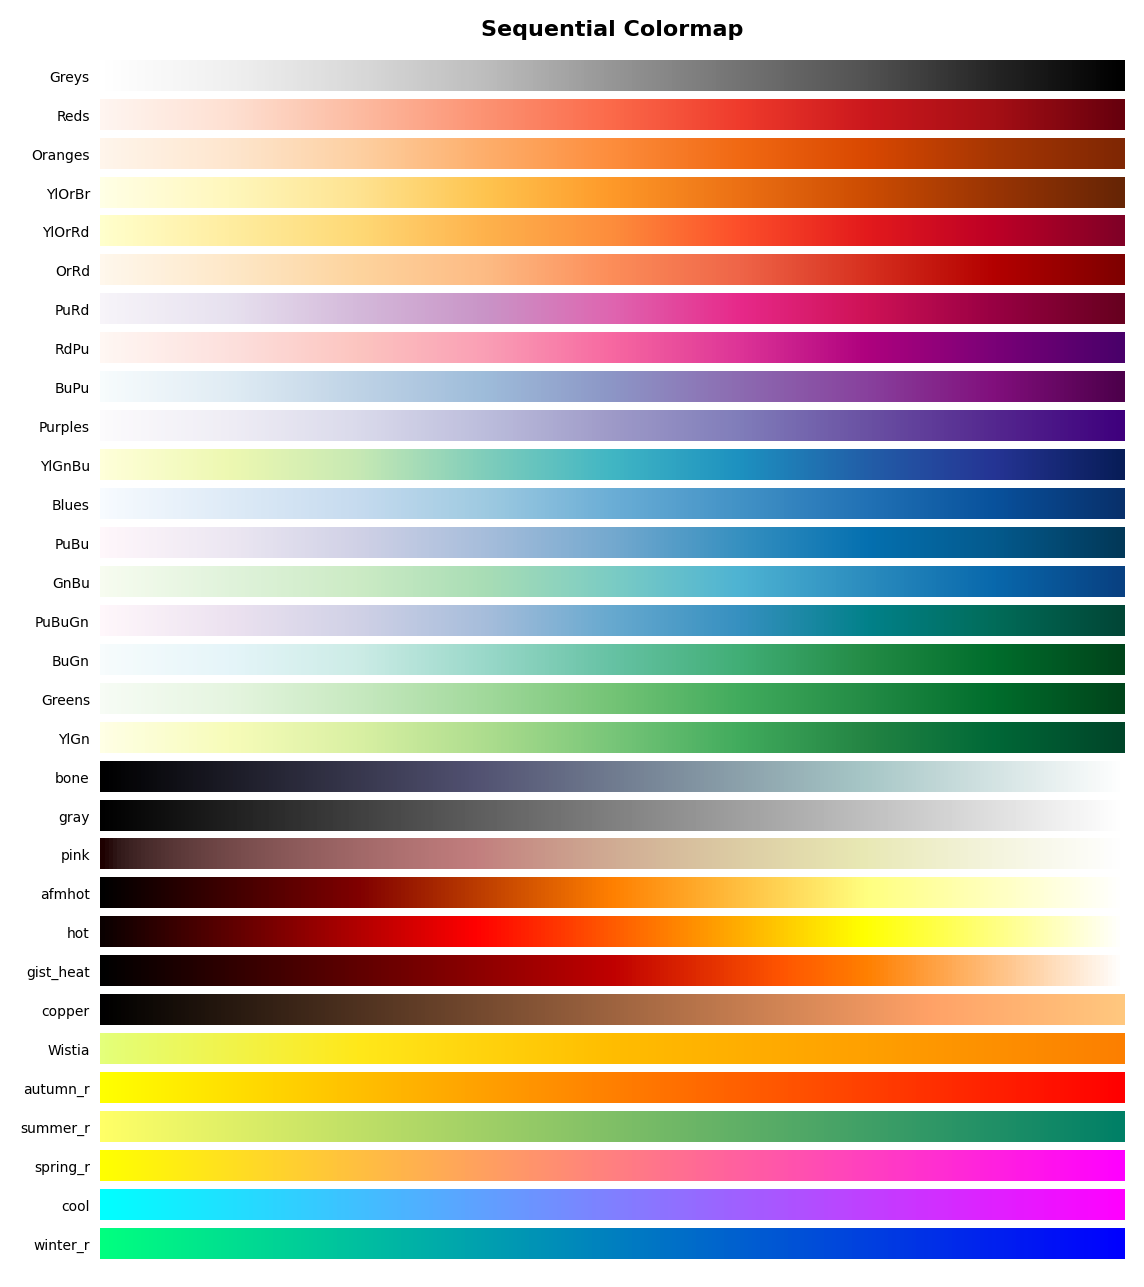

In [13]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

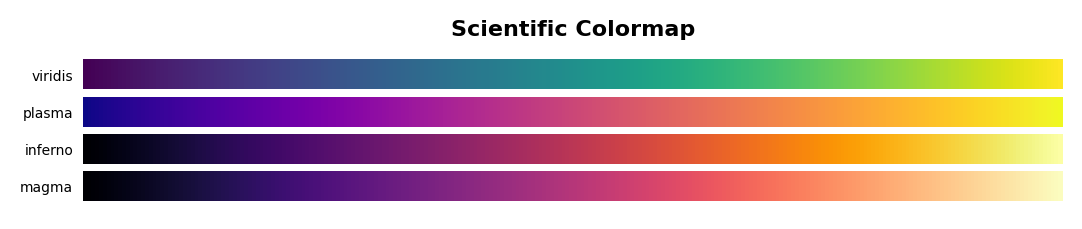

In [14]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



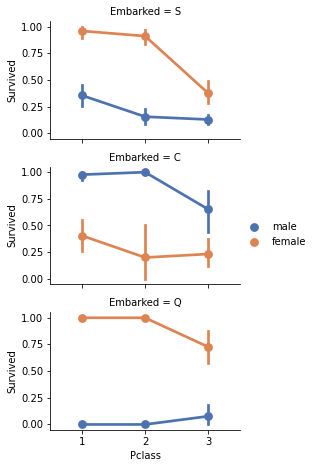

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


In [16]:
# Frequency 

def plotone(variable):
    #input : variable (agevs)
    
    varr = df_train[variable]
    varrcounter = varr.value_counts()
    plt.figure(figsize = (8,3))
    plt.bar(varrcounter.index,varrcounter)
    plt.xticks(varrcounter.index,varrcounter.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: /n {}".format(variable,varrcounter))

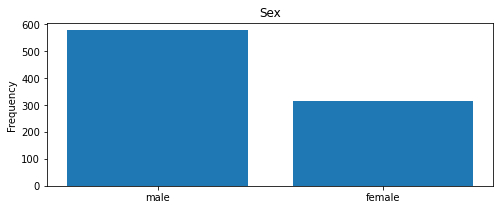

Sex: /n male      577
female    314
Name: Sex, dtype: int64


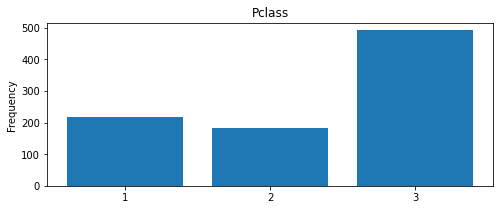

Pclass: /n 3    491
1    216
2    184
Name: Pclass, dtype: int64


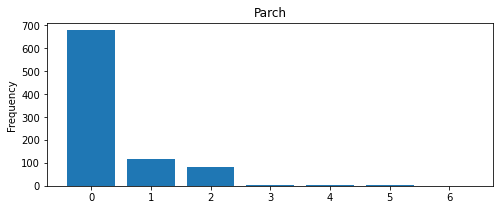

Parch: /n 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


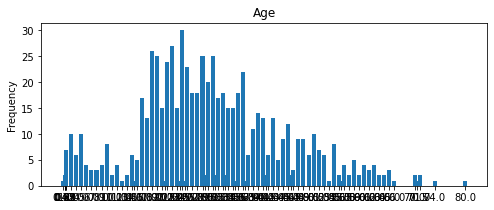

Age: /n 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


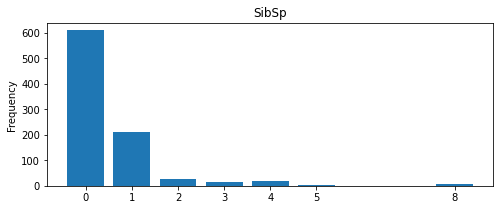

SibSp: /n 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


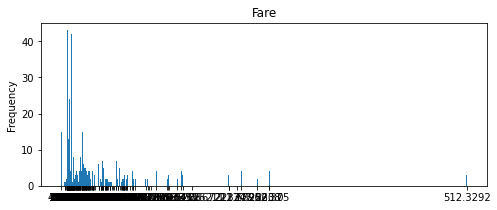

Fare: /n 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


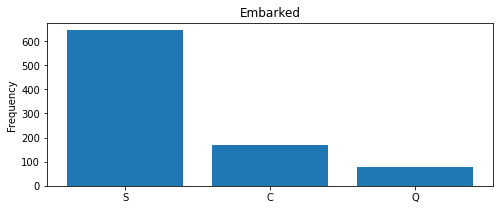

Embarked: /n S    644
C    168
Q     77
Name: Embarked, dtype: int64


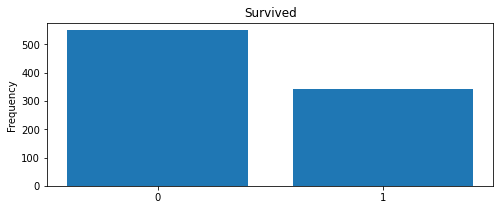

Survived: /n 0    549
1    342
Name: Survived, dtype: int64


In [17]:
cate = ["Sex","Pclass","Parch", "Age", "SibSp", "Fare","Embarked", "Survived"]

for xxx in cate:
    plotone(xxx)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



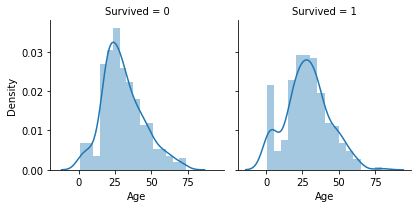

In [18]:
# Explore Age vs Survived
g= sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.distplot, "Age")

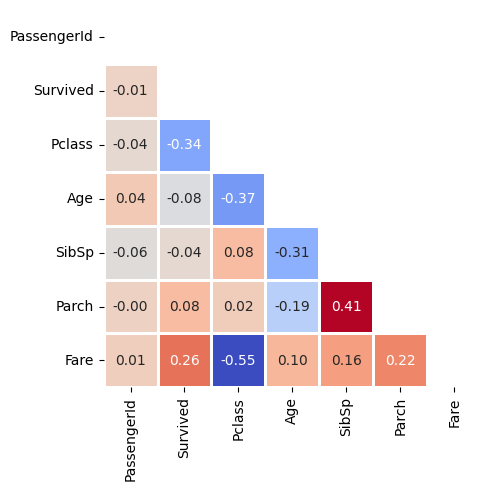

In [19]:
correlation_matrix = df_train.corr()
mask = np.triu(correlation_matrix)

plt.figure(figsize=(5, 5), dpi=100)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

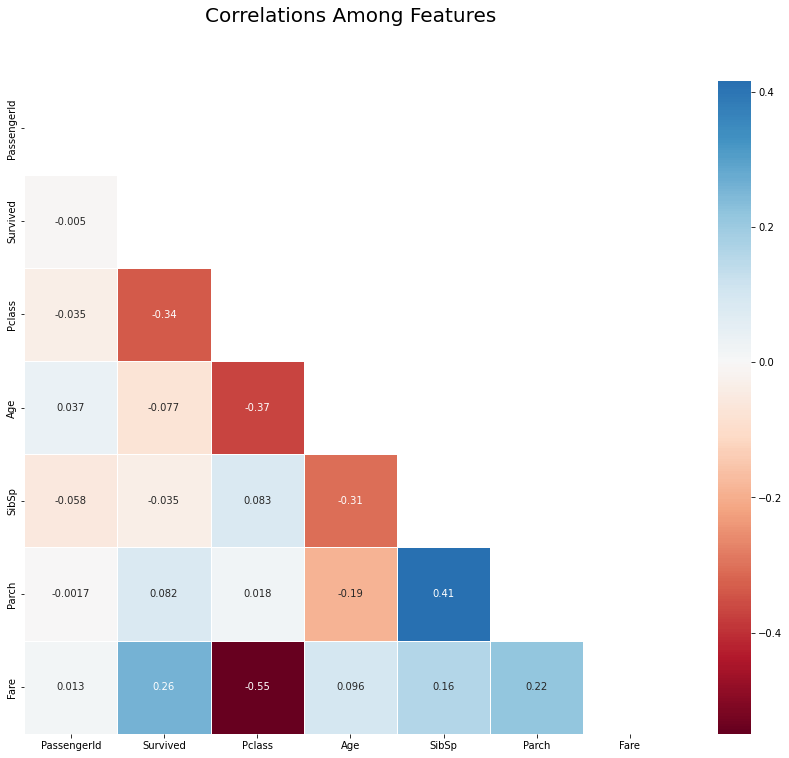

In [20]:
plt.subplots(figsize = (15,12))
sns.heatmap(df_train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);


<AxesSubplot:>

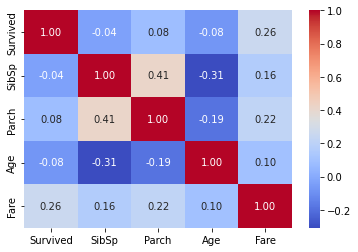

In [21]:
sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



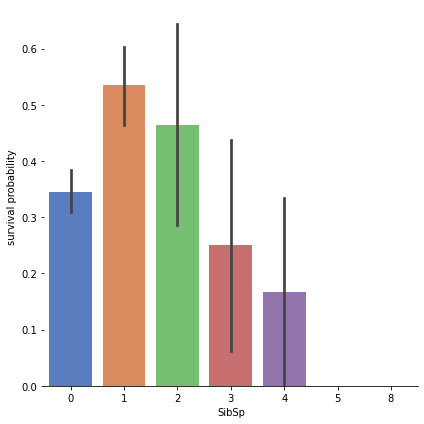

In [22]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=df_train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")


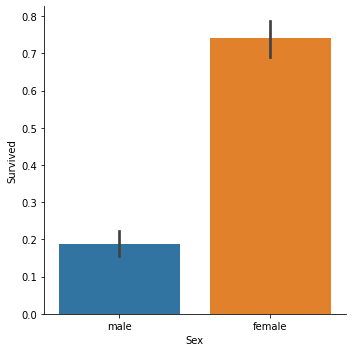

In [23]:
# categorical data viz

sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar')

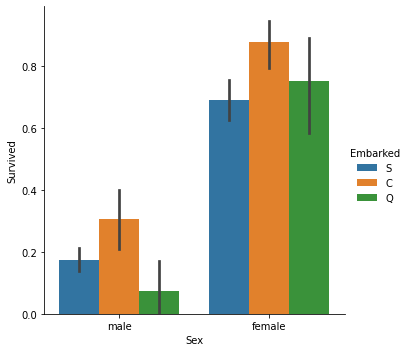

In [24]:
sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar', hue='Embarked')

In [25]:
# Creating different datasets for survivors and non-survivors
df_survivors = df_train[df_train['Survived'] == 1]
df_nonsurvivors = df_train[df_train['Survived'] == 0]

In [26]:
# Filling in the data inside the Violin Objects
violin_survivors = go.Violin(
    y=df_survivors['Age'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Age'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Age" of survivors vs Ages of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [27]:
# Checking out the differences between Fare distribution for survivors and non-survivors
fare_survivors_box = go.Box(  
   x=df_survivors['Fare'],
   name='Survivors',
   marker=dict(color='navy')
)

fare_nonsurvivors_box = go.Box(  
   x=df_nonsurvivors['Fare'],
   name='Non-Survivors',
   marker=dict(color='steelblue')
)
  
data = [fare_nonsurvivors_box, fare_survivors_box]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" value of survivors vs "Fare" value of non-survivors',
    barmode='stack',
    xaxis=dict(
        title='Fare distribution'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



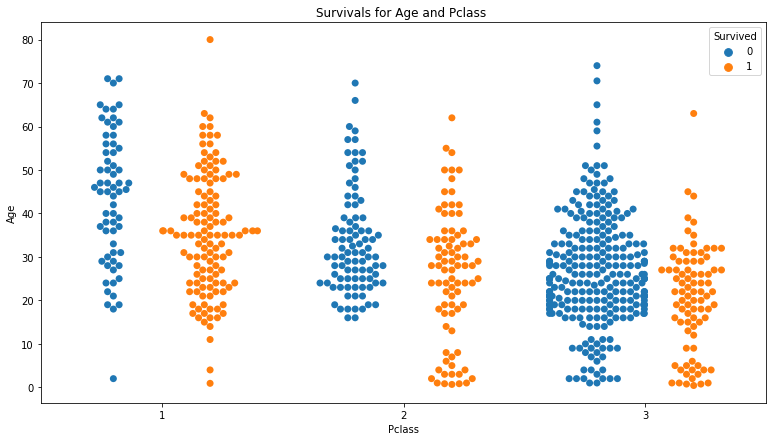

In [28]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=df_train , size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3002: UserWarning:

The `split` parameter has been renamed to `dodge`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3002: UserWarning:

The `split` parameter has been renamed to `dodge`.



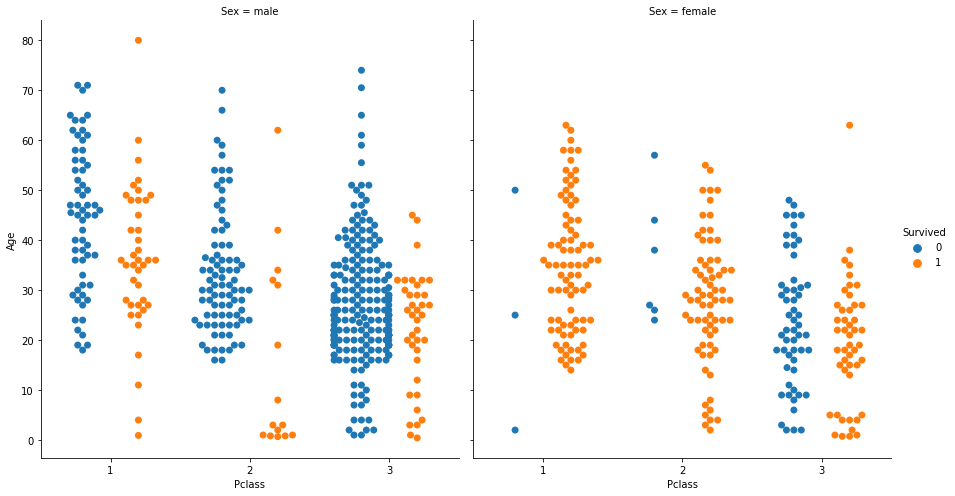

In [29]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="swarm", split=True, size=7, aspect=.9, s=7)

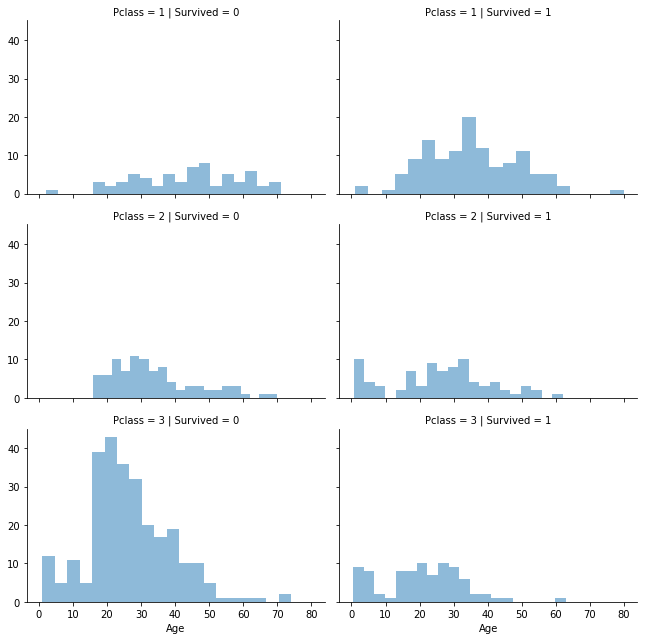

In [30]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



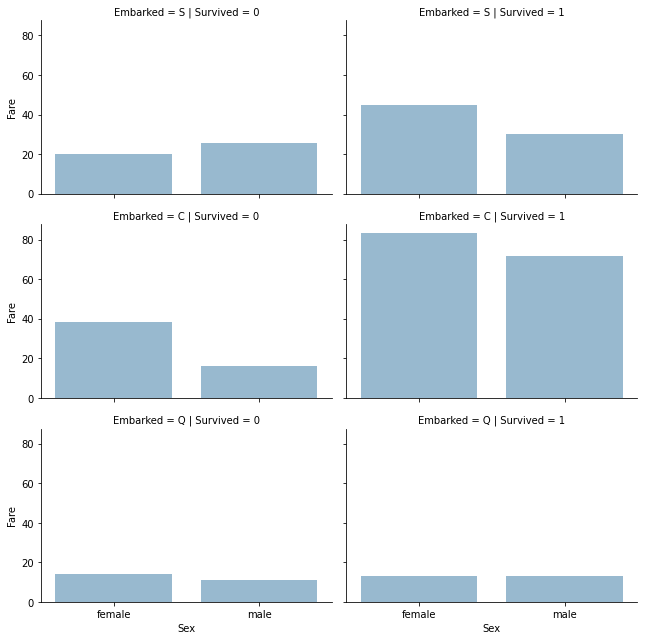

In [31]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=3, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



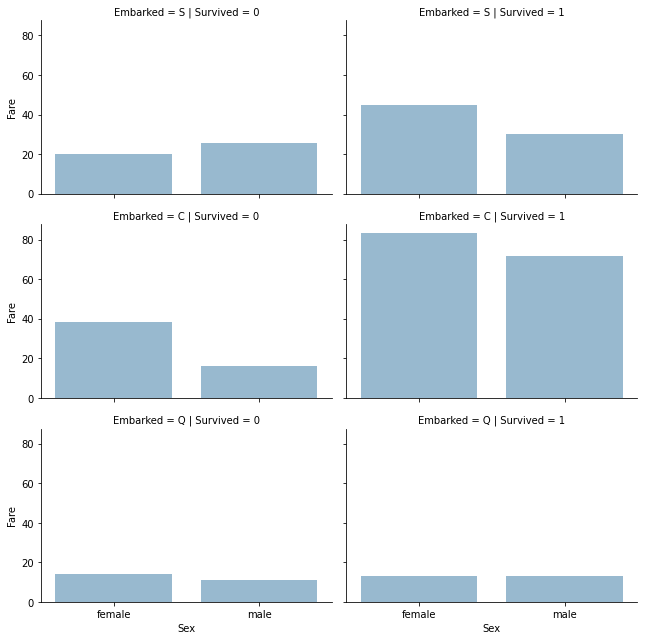

In [32]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=3, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()